[[135 135 137 ...  88  88  88]
 [135 137 141 ...  87  90  91]
 [138 142 143 ...  84  87  92]
 ...
 [111 113 118 ...  24  25  24]
 [112 112 117 ...  25  26  25]
 [106 105 112 ...  24  25  23]]


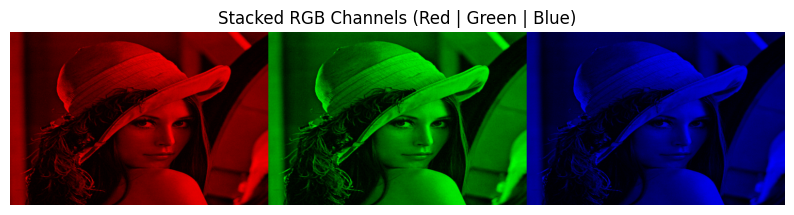

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load image in BGR format (default in OpenCV)
image = cv2.imread('image.png')

# Get image dimensions
height, width, channels = image.shape

# Convert BGR to RGB for correct color representation
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 2. Split into R, G, B channels (Now correctly in RGB order)
r, g, b = cv2.split(image)  # Now r=Red, g=Green, b=Blue
print(r)
# 3. Create blank images for each channel
red_channel = np.zeros_like(image)
green_channel = np.zeros_like(image)
blue_channel = np.zeros_like(image)

# Assign the respective color channels
red_channel[:, :, 0] = r
 # Only Red channel active
green_channel[:, :, 1] = g  # Only Green channel active
blue_channel[:, :, 2] = b  # Only Blue channel active

# 4. Stack the images horizontally in the correct **RGB** order
stacked_image = np.hstack((red_channel, green_channel, blue_channel))

# 5. Display the stacked channels
plt.figure(figsize=(10, 5))
plt.imshow(stacked_image)
plt.title('Stacked RGB Channels (Red | Green | Blue)')
plt.axis('off')
plt.show()


In [ ]:
# Q2 : Scaling, rotation, translation, Sher (Vertical), Sher (Horizontal) on the “Lena_Image”.


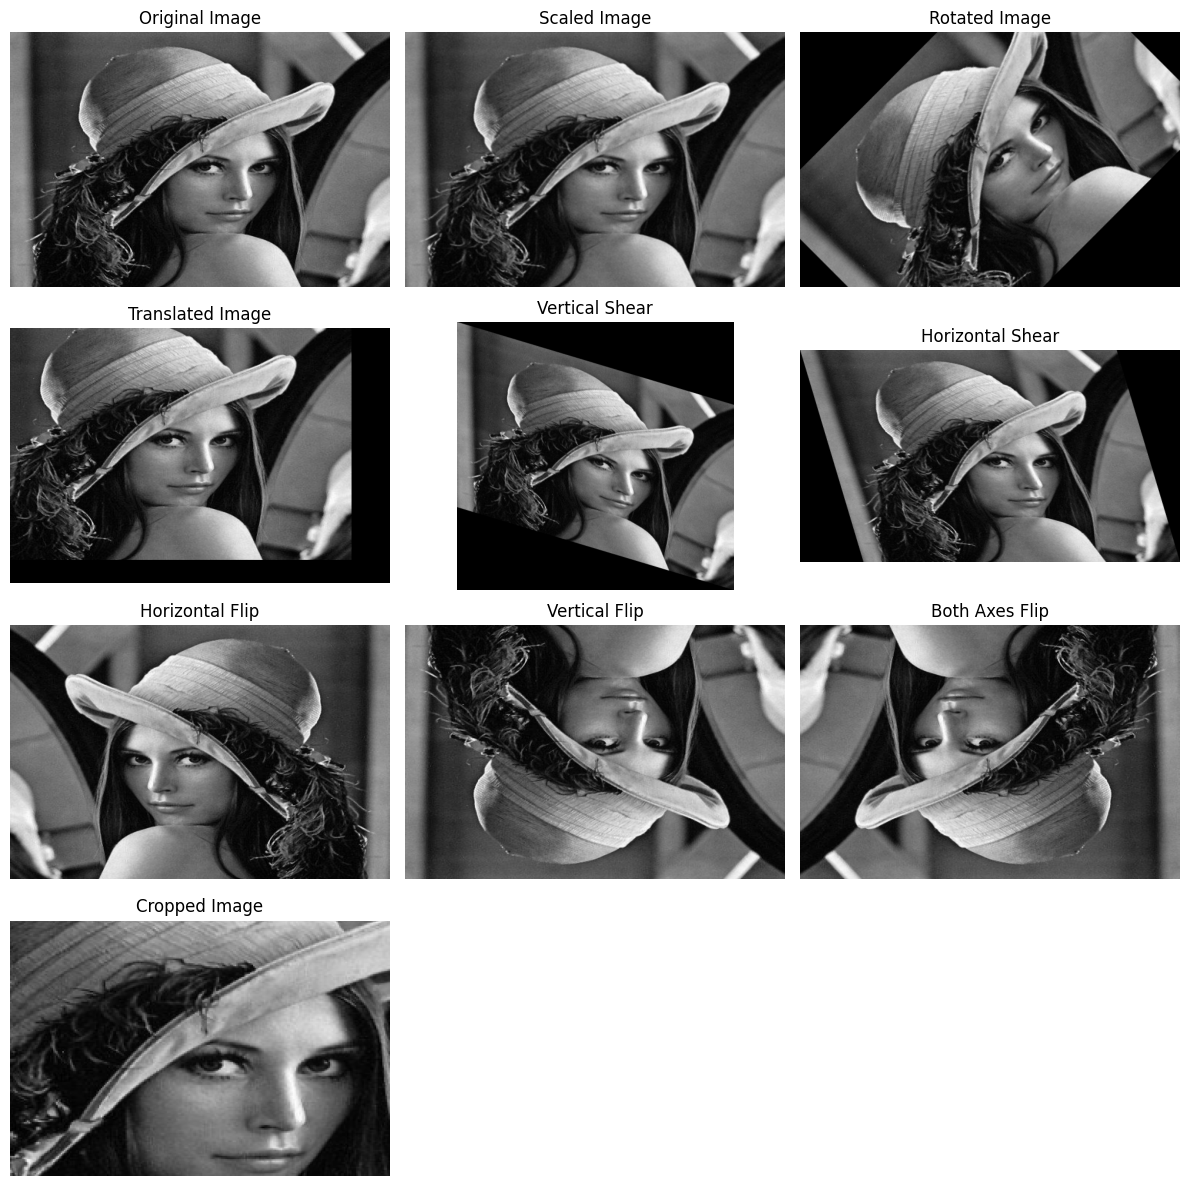

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('image.png')

# Get image dimensions
rows, cols, _ = image.shape

# Scaling
scale_factor = 2.0
scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

# Rotation
angle = 45
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

# Translation
tx, ty = -50, -30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))

# Vertical Shear
shear_factor_vertical = 0.3
vertical_shear_matrix = np.float32([[1, 0, 0], [shear_factor_vertical, 1, 0]])
vertically_sheared_image = cv2.warpAffine(image, vertical_shear_matrix, (cols, int(rows + shear_factor_vertical * cols)))

# Horizontal Shear
shear_factor_horizontal = 0.3
horizontal_shear_matrix = np.float32([[1, shear_factor_horizontal, 0], [0, 1, 0]])
horizontally_sheared_image = cv2.warpAffine(image, horizontal_shear_matrix, (int(cols + shear_factor_horizontal * rows), rows))

# **Reflection (Flipping)**
horizontal_flip = cv2.flip(image, 1)  # Left-right reflection
vertical_flip = cv2.flip(image, 0)  # Top-bottom reflection
both_axes_flip = cv2.flip(image, -1)  # Flips both horizontally & vertically

# **Cropping (Region of Interest - ROI)**
x1, y1, x2, y2 = int(cols * 0.25), int(rows * 0.25), int(cols * 0.75), int(rows * 0.75)
cropped_image = image[y1:y2, x1:x2]  # Crop the center region of the image

# Display all transformations
plt.figure(figsize=(12, 12))

plt.subplot(4, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image')
plt.axis('off')

plt.subplot(4, 3, 3)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')

plt.subplot(4, 3, 4)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')
plt.axis('off')

plt.subplot(4, 3, 5)
plt.imshow(cv2.cvtColor(vertically_sheared_image, cv2.COLOR_BGR2RGB))
plt.title('Vertical Shear')
plt.axis('off')

plt.subplot(4, 3, 6)
plt.imshow(cv2.cvtColor(horizontally_sheared_image, cv2.COLOR_BGR2RGB))
plt.title('Horizontal Shear')
plt.axis('off')

plt.subplot(4, 3, 7)
plt.imshow(cv2.cvtColor(horizontal_flip, cv2.COLOR_BGR2RGB))
plt.title('Horizontal Flip')
plt.axis('off')

plt.subplot(4, 3, 8)
plt.imshow(cv2.cvtColor(vertical_flip, cv2.COLOR_BGR2RGB))
plt.title('Vertical Flip')
plt.axis('off')

plt.subplot(4, 3, 9)
plt.imshow(cv2.cvtColor(both_axes_flip, cv2.COLOR_BGR2RGB))
plt.title('Both Axes Flip')
plt.axis('off')

plt.subplot(4, 3, 10)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.tight_layout()
plt.show()


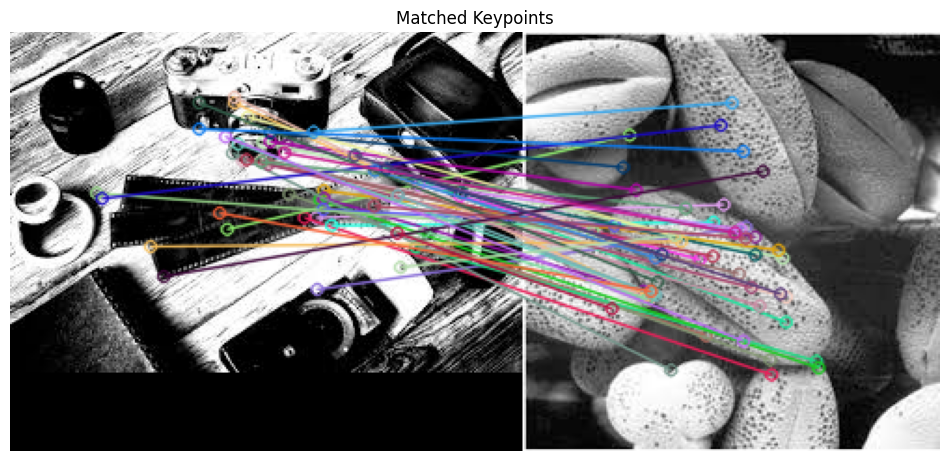

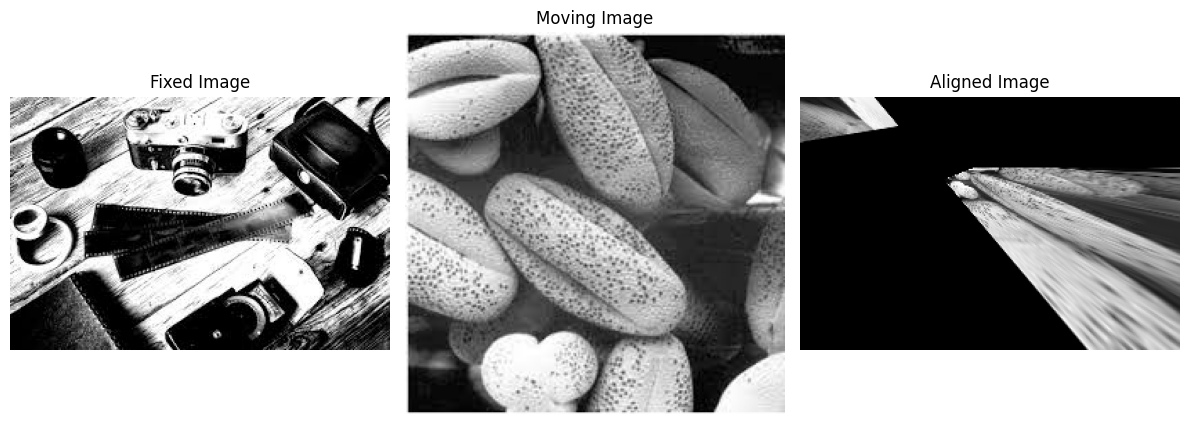

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
fixed_image = cv2.imread('image-2.jpeg', cv2.IMREAD_GRAYSCALE)  # Replace with your fixed image path
moving_image = cv2.imread('image-1.jpeg', cv2.IMREAD_GRAYSCALE)  # Replace with your moving image path

# Step 1: Detect keypoints and descriptors using ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = orb.detectAndCompute(fixed_image, None)
keypoints2, descriptors2 = orb.detectAndCompute(moving_image, None)

# Step 2: Match descriptors using BFMatcher (Brute Force Matcher)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (lower distance means a better match)
matches = sorted(matches, key=lambda x: x.distance)

# Step 3: Draw the top matches
matched_image = cv2.drawMatches(fixed_image, keypoints1, moving_image, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 6))
plt.title('Matched Keypoints')
plt.imshow(matched_image, cmap='gray')
plt.axis('off')
plt.show()

# Step 4: Extract location of good matches
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Step 5: Compute Homography (transformation matrix)
matrix, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

# Step 6: Warp the moving image to align with the fixed image
height, width = fixed_image.shape
aligned_image = cv2.warpPerspective(moving_image, matrix, (width, height))

# Step 7: Display the registered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Fixed Image')
plt.imshow(fixed_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Moving Image')
plt.imshow(moving_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Aligned Image')
plt.imshow(aligned_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


<ipython-input-25-c6e86c319f4b>:13: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(1 + image))
<ipython-input-25-c6e86c319f4b>:14: RuntimeWarning: invalid value encountered in cast
  log_image = np.uint8(log_image)  # Convert back to 8-bit


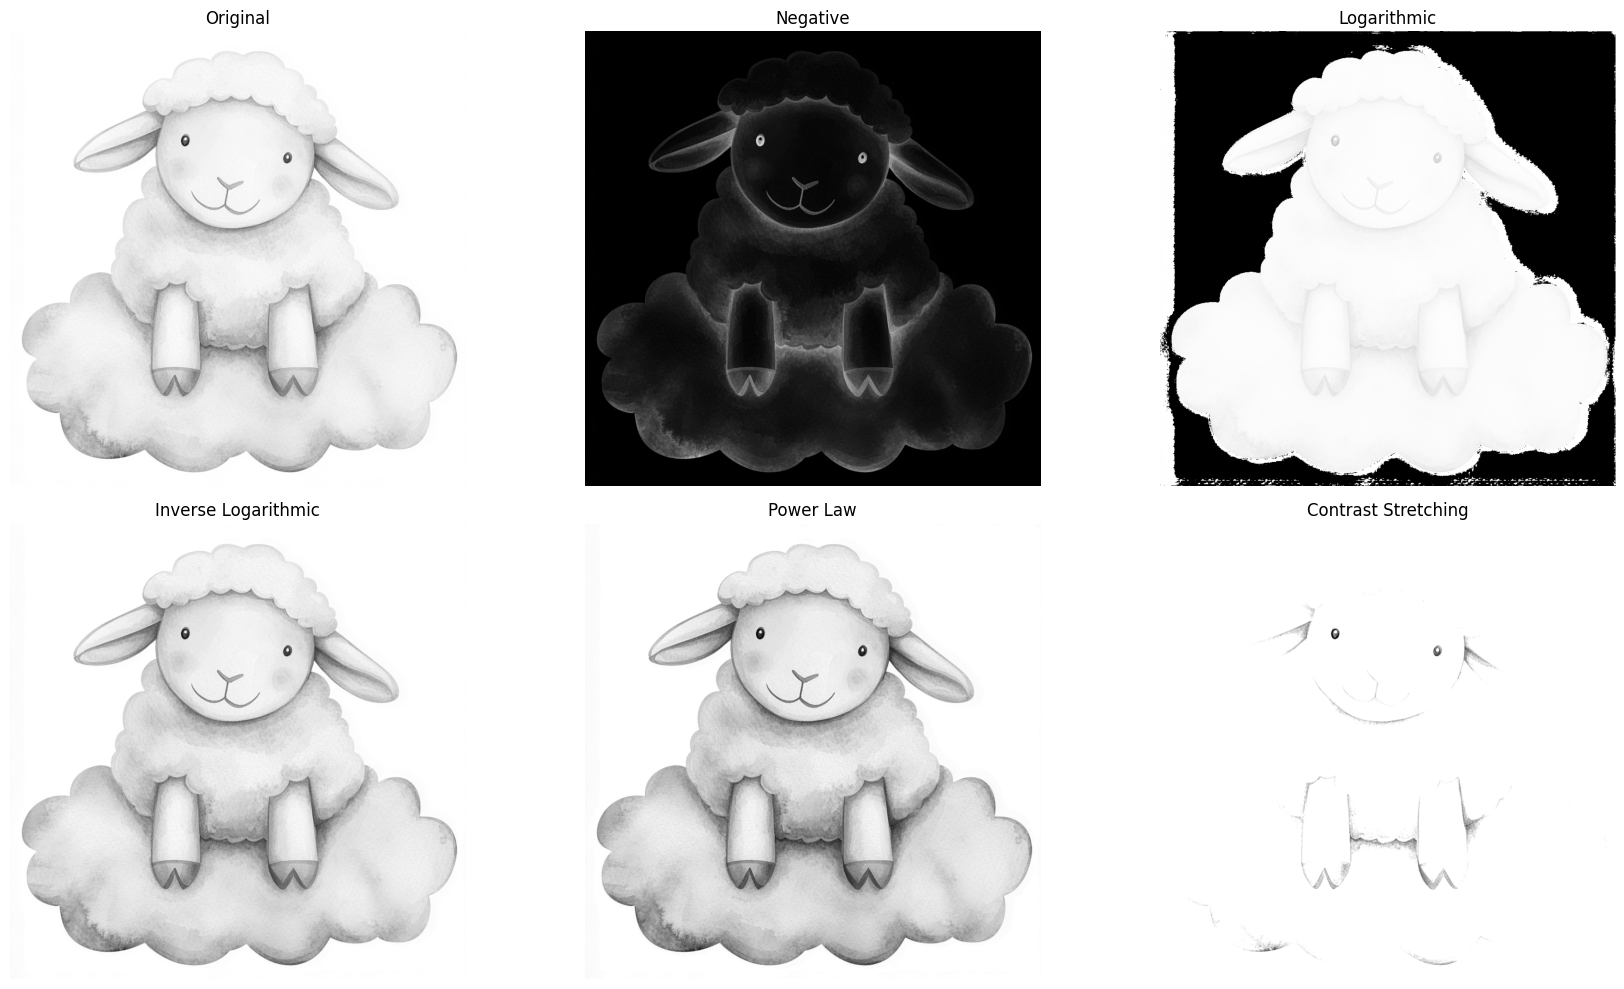

<ipython-input-50-a97ea8826338>:18: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(1 + image))
<ipython-input-50-a97ea8826338>:19: RuntimeWarning: invalid value encountered in cast
  log_image = np.uint8(log_image)  # Convert back to 8-bit
<ipython-input-50-a97ea8826338>:29: RuntimeWarning: divide by zero encountered in power
  power_law_image = c * (image ** gamma)
<ipython-input-50-a97ea8826338>:30: RuntimeWarning: invalid value encountered in cast
  power_law_image = np.uint8(power_law_image)


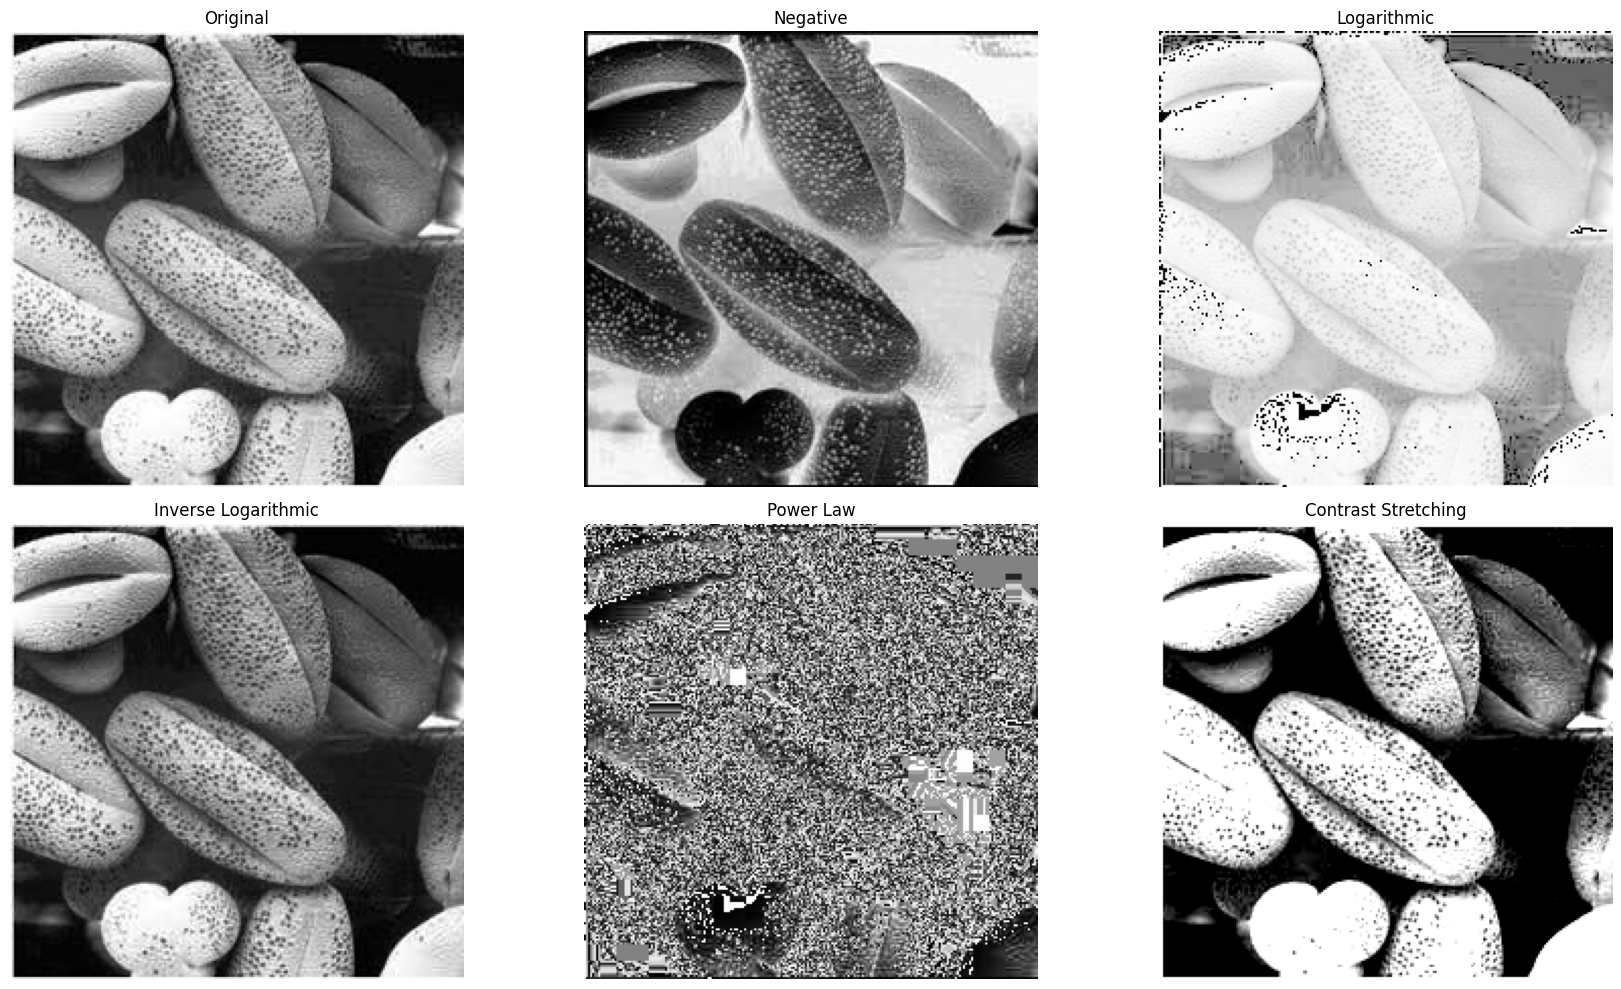

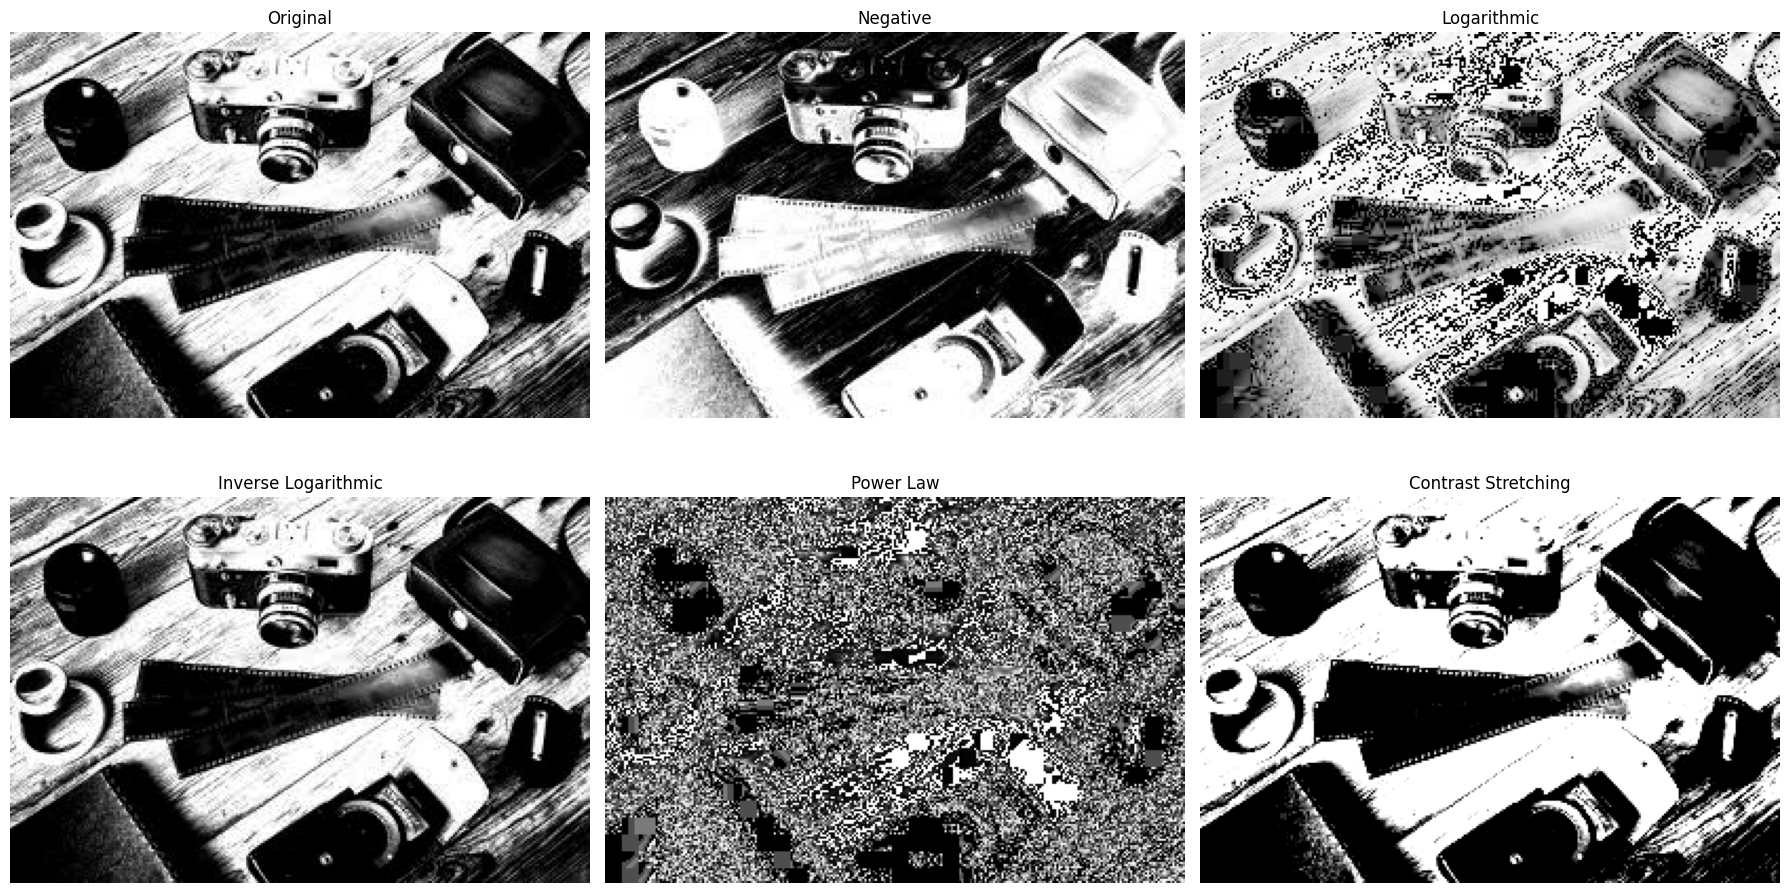

In [ ]:
# 4.Intensity transformation
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image and apply transformations
def load_image(image_path):
    # Read the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image at path '{image_path}' could not be loaded.")

    # a. Negative Transformation
    negative_image = 255 - image

    # b. Logarithmic Transformation
    c = 255 / np.log(1 + np.max(image))  # Scaling factor
    log_image = c * (np.log(1 + image))
    log_image = np.uint8(log_image)  # Convert back to 8-bit

    # c. Inverse Logarithmic (Exponential) Transformation
    c = 255 / (np.exp(1) - 1)
    inverse_log_image = c * (np.exp(image / 255) - 1)
    inverse_log_image = np.uint8(inverse_log_image)

    # d. Power-Law Transformation
    gamma = -2.2  # You can try different gamma values
    c = 255 / (np.max(image) ** gamma)
    power_law_image = c * (image ** gamma)
    power_law_image = np.uint8(power_law_image)

    # e. Contrast Stretching with Thresholding
    r1, r2 = 70, 180  # Example thresholds
    contrast_stretched = np.zeros_like(image)
    contrast_stretched[image <= r1] = 0
    contrast_stretched[image >= r2] = 255
    mask = (image > r1) & (image < r2)
    contrast_stretched[mask] = (255 / (r2 - r1)) * (image[mask] - r1)

    # Return all the images
    return image, negative_image, log_image, inverse_log_image, power_law_image, contrast_stretched

# Load the image and transformations
try:
    original, negative, log_image, inverse_log, power_law, contrast = load_image('image-1.jpeg')

    # Display the results
    titles = ['Original', 'Negative', 'Logarithmic', 'Inverse Logarithmic', 'Power Law', 'Contrast Stretching']
    images = [original, negative, log_image, inverse_log, power_law, contrast]

    plt.figure(figsize=(18, 10))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        plt.title(titles[i])
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    original, negative, log_image, inverse_log, power_law, contrast = load_image('image-2.jpeg')

    # Display the results

    plt.figure(figsize=(18, 10))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        plt.title(titles[i])
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(e)


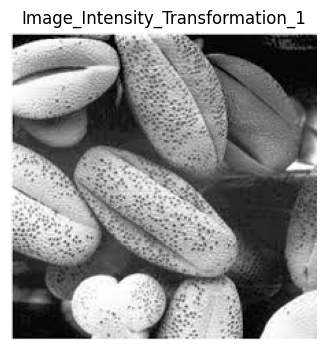

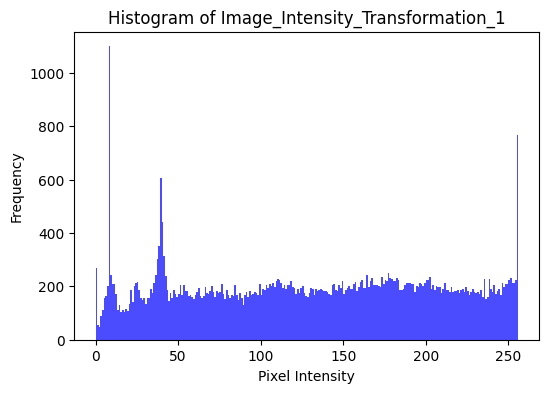

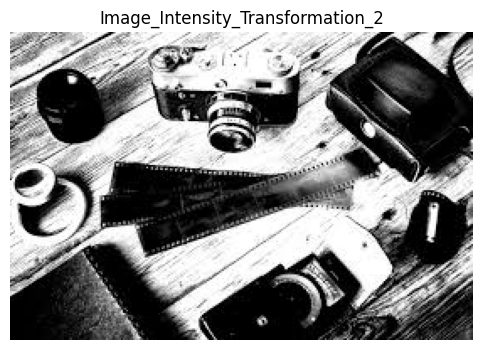

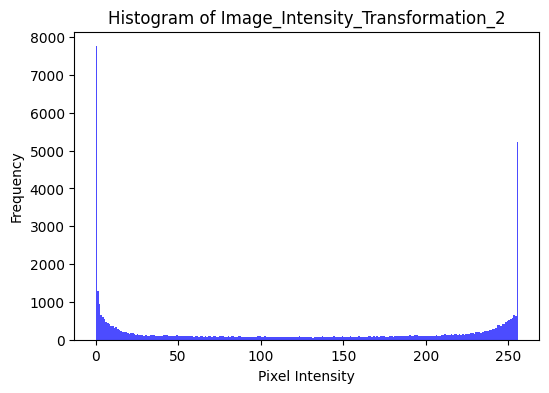

In [ ]:
#5. Function to plot histograms
def plot_histogram(image, title):
    plt.figure(figsize=(6, 4))
    plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

# Main Code
try:
    # Replace with your image filenames
    image_path_1 = 'image-1.jpeg'
    image_path_2 = 'image-2.jpeg'

    # Load images in grayscale
    image_1 = cv2.imread(image_path_1, cv2.IMREAD_GRAYSCALE)
    image_2 = cv2.imread(image_path_2, cv2.IMREAD_GRAYSCALE)

    # Check if images are loaded properly
    if image_1 is None or image_2 is None:
        raise FileNotFoundError("One or more images not found.")

    # Display images and histograms
    titles = ['Image_Intensity_Transformation_1', 'Image_Intensity_Transformation_2']
    images = [image_1, image_2]

    for i in range(len(images)):
        # Show original image
        plt.figure(figsize=(6, 4))
        plt.title(titles[i])
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.show()

        # Show histogram
        plot_histogram(images[i], f"Histogram of {titles[i]}")

except FileNotFoundError as e:
    print(e)
